Time Series Analysis of a Stock (Pets at Home)

In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [21]:
ticker = 'PETS.L'
data = yf.download(ticker, start='2015-01-01', end='2024-01-01')


[*********************100%***********************]  1 of 1 completed


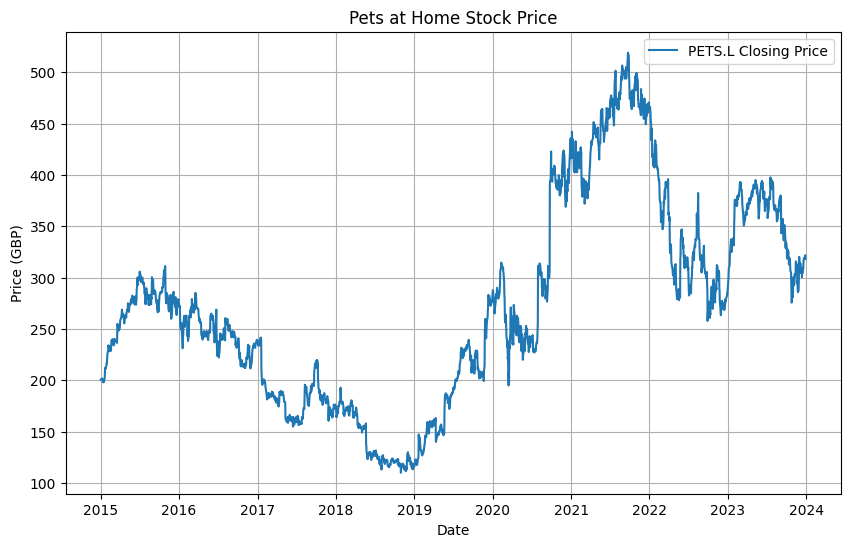

In [22]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='PETS.L Closing Price')
plt.title('Pets at Home Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (GBP)')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
model = ARIMA(data['Close'].dropna(), order=(5, 1, 0))  # (p, d, q) can be tuned
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2272
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7442.564
Date:                Sat, 14 Sep 2024   AIC                          14897.127
Time:                        18:51:50   BIC                          14931.495
Sample:                             0   HQIC                         14909.665
                               - 2272                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0076      0.018     -0.425      0.671      -0.043       0.027
ar.L2          0.0166      0.017      0.999      0.318      -0.016       0.049
ar.L3          0.0281      0.016      1.745      0.0

In [25]:
forecast_steps = 252 * 5  # Approximate 252 trading days per year for 5 years
forecast = model_fit.forecast(steps=forecast_steps)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


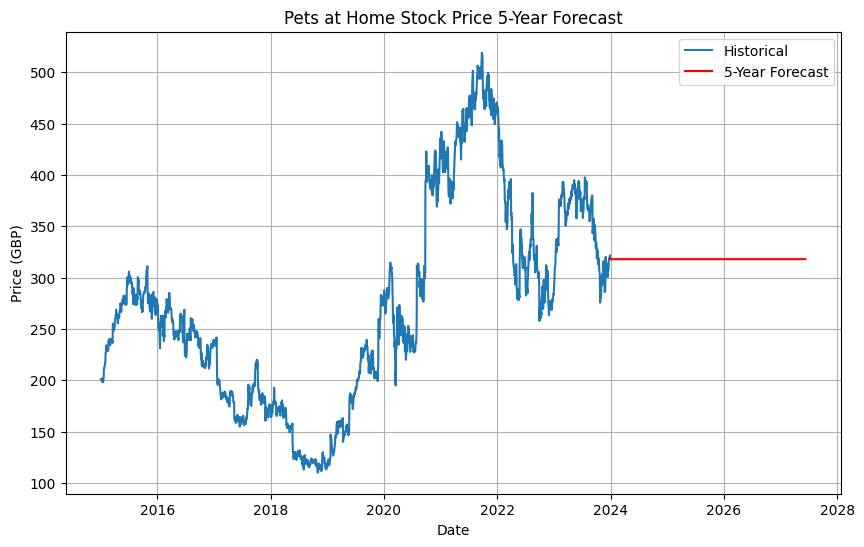

In [26]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'].dropna(), label='Historical')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps, freq='D'), forecast, label='5-Year Forecast', color='red')
plt.title('Pets at Home Stock Price 5-Year Forecast')
plt.xlabel('Date')
plt.ylabel('Price (GBP)')
plt.legend()
plt.grid(True)
plt.show()
